In [41]:
from CGS import solve_cgs;
from CGN import solve_cgn;
from scipy.sparse.linalg import qmr;
import matrixgenerators
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# To be ran 
import importlib
import CGS
import CGN
import matrixgenerators

importlib.reload(CGS)
importlib.reload(CGN)
importlib.reload(matrixgenerators)

from CGS import solve_cgs
from CGN import solve_cgn


[array([-0.39229065,  0.03140492,  0.01935474,  0.32603104,  0.95725161,
       -0.10208799, -0.43540184, -0.07447244]), [1.7479937179621878, 2129.4887666213085, 261.1548416973581, 9.104671473608853, 1.7394788405406199, 16.482201482174222, 0.4555804929806067, 0.7334639723655259, 6.479966930678729e-12], True]


First experiment: Calculating residual error and time to converge for entirely-random matrices of varying sizes.

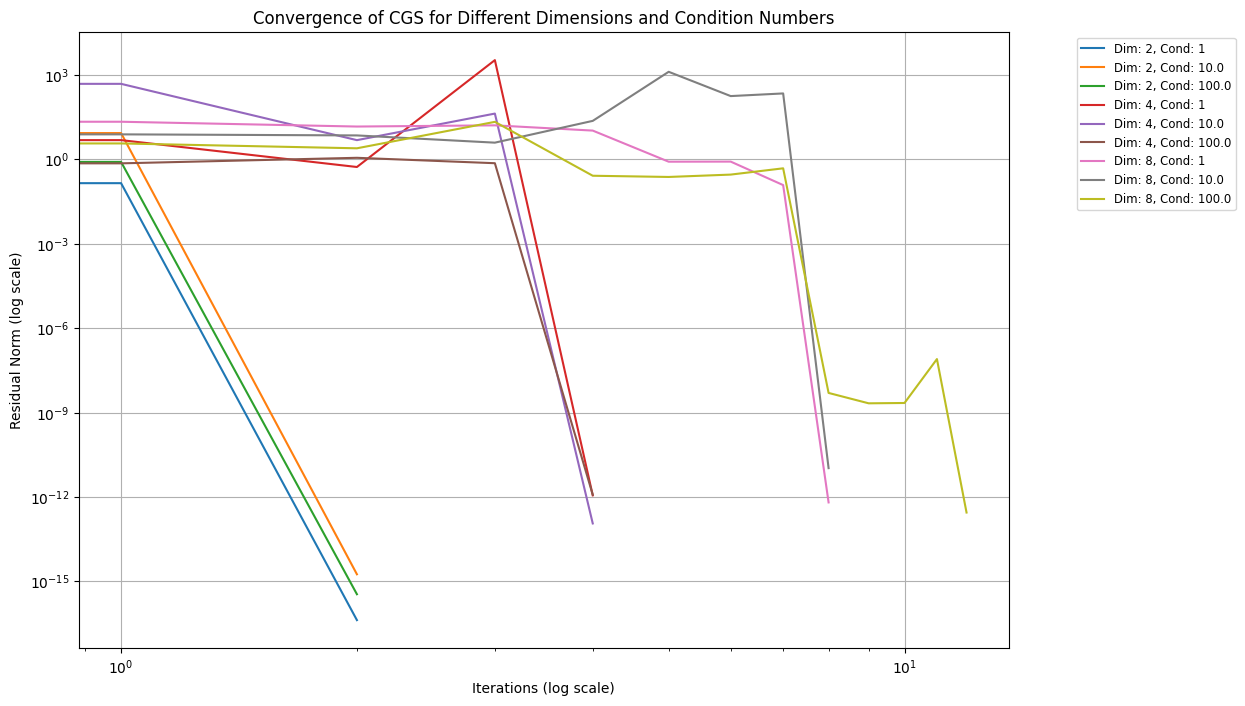

In [ ]:
# Dimensions and condition numbers to test
# N = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# kappa = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]

N = [2, 4, 8]
kappa = [1, 1e1, 1e2]

# Generate matrices for all dimensions and condition numbers
matrices = {}

for NN in N:
    matrices[NN] = {}
    for kk in kappa:
        matrices[NN][kk] = matrixgenerators.cond_num_matrix(NN, kk)

# Store residuals for CGS
results_cgs = {}

dim = 2
while dim <= 1024:
# while dim <= 8:
    b = np.random.rand(dim)  # Random right-hand side vector
    results_cgs[dim] = {}

    for cond in matrices[dim]:
        A = matrices[dim][cond]
        _, residuals, _ = solve_cgs(A, b)  # Use solve_cgs to get residuals
        results_cgs[dim][cond] = residuals

    dim *= 2

# Plot residuals for CGS
plt.figure(figsize=(12, 8))
for dim in results_cgs:
    for cond, residuals in results_cgs[dim].items():
        plt.plot(residuals, label=f"Dim: {dim}, Cond: {cond}")

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title("Convergence of CGS for Different Dimensions and Condition Numbers")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1), fontsize="small")
plt.grid()
plt.show()